# Assignment Text mining E-Commerce Website

1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

# Web Scrapping 

In [ ]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install requests-html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Install and Import Beautifull Soap

In [ ]:
#from urllib.request import urlopen

In [ ]:
#reviews=soup.find_all('div',{'data-hook':'review'})

In [ ]:
#r=s.get(url)

In [ ]:
from requests_html import HTMLSession

In [ ]:
import requests

In [ ]:
import pandas as pd

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
import seaborn as sns

In [ ]:
def getnextpage(soup):
    page=soup.find()

In [ ]:
s=HTMLSession()

In [ ]:
url='https://www.amazon.in/Sparx-Flops-Thong-Sandals-8-SF0541G/product-reviews/B078HXTTCC/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1'

# Functions to get the content of the required reviews and pages of website

In [ ]:
def getamazon(url):
 
    soup=BeautifulSoup(r.text,'html.parser')
    return soup

In [ ]:
def get_soup(url):
    
    r=s.get(url)
    soup = BeautifulSoup(r.content, "html.parser")
    return soup

In [ ]:
review_list = []

In [ ]:
def get_reviews(soup):
    reviews=soup.find_all('div',{'data-hook':'review'})
    try:
        for item in reviews:
            review={
                'product':soup.title.text.replace('Amazon.in:Customer reviews: Sparx Men&#39;s Black Flip Flop-8 UK (SF0541G)','Mens Black Flip Flop-8 UK').strip(),
                'title':item.find('a',{'data-hook':'review-title'}).text.strip(),
                'rating':float(item.find('i',{'data-hook':'review-star-rating'}).text.replace('out of 5 stars','').strip()),
                'body':item.find('span',{'data-hook':'review-body'}).text.strip()  
            }
            review_list.append(review)
            
    except:
        pass 

In [ ]:
soup=get_soup('https://www.amazon.in/Sparx-Flops-Thong-Sandals-8-SF0541G/product-reviews/B078HXTTCC/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1')

In [ ]:
print(soup.title.text)

Amazon.in:Customer reviews: Sparx Men&#39;s Black Flip Flop-8 UK (SF0541G)


In [ ]:
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func

In [ ]:
get_reviews(soup)

In [ ]:
print(len(review_list))

10


In [ ]:
print(review_list[0])

{'product': 'Mens Black Flip Flop-8 UK', 'title': 'Good not the best', 'rating': 4.0, 'body': 'Better than others of sparks of same range price.'}


In [ ]:
review=[]

In [ ]:
for x in range(1,8):
    soup=get_soup(f'https://www.amazon.in/Sparx-Flops-Thong-Sandals-8-SF0541G/product-reviews/B078HXTTCC/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    print(f'Getting page: {x}')
    review += review_list
    print(len(review_list))
    if not soup.find('li',{'class':'a-disabled a-last'}):
        pass
    else:
        break

Getting page: 1
10
Getting page: 2
10
Getting page: 3
10
Getting page: 4
10
Getting page: 5
10
Getting page: 6
10
Getting page: 7
10


In [ ]:
df=pd.DataFrame(review)

In [ ]:
#df.to_excel('amazone_review_assignment.xlsx',index=False)

## Created the dataframe for text mining

In [ ]:
df.iloc[8,0]

'Mens Black Flip Flop-8 UK'

In [ ]:
df

,product,title,rating,body
0,Mens Black Flip Flop-8 UK,Good not the best,4.0,Better than others of sparks of same range price.
1,Mens Black Flip Flop-8 UK,Lookwise good but very soft not use longer,3.0,Look wise good but Quality very low no use for...
2,Mens Black Flip Flop-8 UK,Not good,3.0,Not reached up to mark
3,Mens Black Flip Flop-8 UK,It's very smooth sleeper,4.0,Nice product
4,Mens Black Flip Flop-8 UK,फिट फाट,4.0,बढ़िया है ले सकते है दाम भी ठीके है
...,...,...,...,...
65,Mens Black Flip Flop-8 UK,Size 6 per foot but small straps for size 5,3.0,Size is fine but straps are for smaller foot
66,Mens Black Flip Flop-8 UK,Useful,3.0,Very nice product
67,Mens Black Flip Flop-8 UK,This is a best Sparx sleper,5.0,this is a comfortable sleeper and official look
68,Mens Black Flip Flop-8 UK,Good as aspected,4.0,Nothing


# Text Mining

### Importing Libraries

In [ ]:
!python -m spacy download en_core_web_sm

2023-04-21 18:29:20.260911: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-21 18:29:21.438742: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 77.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import spacy

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head(50)

,product,title,rating,body
0,Mens Black Flip Flop-8 UK,Good not the best,4.0,Better than others of sparks of same range price.
1,Mens Black Flip Flop-8 UK,Lookwise good but very soft not use longer,3.0,Look wise good but Quality very low no use for...
2,Mens Black Flip Flop-8 UK,Not good,3.0,Not reached up to mark
3,Mens Black Flip Flop-8 UK,It's very smooth sleeper,4.0,Nice product
4,Mens Black Flip Flop-8 UK,फिट फाट,4.0,बढ़िया है ले सकते है दाम भी ठीके है
5,Mens Black Flip Flop-8 UK,Size 6 per foot but small straps for size 5,3.0,Size is fine but straps are for smaller foot
6,Mens Black Flip Flop-8 UK,Useful,3.0,Very nice product
7,Mens Black Flip Flop-8 UK,This is a best Sparx sleper,5.0,this is a comfortable sleeper and official look
8,Mens Black Flip Flop-8 UK,Good as aspected,4.0,Nothing
9,Mens Black Flip Flop-8 UK,Slippers,3.0,Good comfort


In [ ]:
df['body']

0     Better than others of sparks of same range price.
1     Look wise good but Quality very low no use for...
2                                Not reached up to mark
3                                          Nice product
4                    बढ़िया है ले सकते है दाम भी ठीके है
                            ...                        
65         Size is fine but straps are for smaller foot
66                                    Very nice product
67      this is a comfortable sleeper and official look
68                                              Nothing
69                                         Good comfort
Name: body, Length: 70, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  70 non-null     object 
 1   title    70 non-null     object 
 2   rating   70 non-null     float64
 3   body     70 non-null     object 
dtypes: float64(1), object(3)
memory usage: 2.3+ KB


In [ ]:
df.describe()

,rating
count,70.000000
mean,3.600000
std,0.668114
min,3.000000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


# Data frame contain non-english languages letus Translate it

In [ ]:
#pip install googletrans==4.0.0-rc1

In [ ]:
import pandas as pd
from googletrans import Translator

In [ ]:
# Initialize the translator object
translator = Translator(service_urls=['translate.google.com'])

In [ ]:
# Define a function to translate non-English text to English 
def translate_text(text):
    try:
        return translator.translate(text).text
    except Exception as e:
        print(e)
        return None

df['body_en'] = df['body'].apply(translate_text)

In [ ]:
# Print the translated DataFrame
df

,product,title,rating,body,body_en
0,Mens Black Flip Flop-8 UK,Good not the best,4.0,Better than others of sparks of same range price.,Better than others of sparks of same range price.
1,Mens Black Flip Flop-8 UK,Lookwise good but very soft not use longer,3.0,Look wise good but Quality very low no use for...,Look wise good but Quality very low no use for...
2,Mens Black Flip Flop-8 UK,Not good,3.0,Not reached up to mark,Not reached up to mark
3,Mens Black Flip Flop-8 UK,It's very smooth sleeper,4.0,Nice product,Nice product
4,Mens Black Flip Flop-8 UK,फिट फाट,4.0,बढ़िया है ले सकते है दाम भी ठीके है,It is good that you can take the price
...,...,...,...,...,...
65,Mens Black Flip Flop-8 UK,Size 6 per foot but small straps for size 5,3.0,Size is fine but straps are for smaller foot,Size is fine but straps are for smaller foot
66,Mens Black Flip Flop-8 UK,Useful,3.0,Very nice product,Very nice product
67,Mens Black Flip Flop-8 UK,This is a best Sparx sleper,5.0,this is a comfortable sleeper and official look,this is a comfortable sleeper and official look
68,Mens Black Flip Flop-8 UK,Good as aspected,4.0,Nothing,Nothing


## Data Text processing (converting to lowe case ,stemming and removing stopwords)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  70 non-null     object 
 1   title    70 non-null     object 
 2   rating   70 non-null     float64
 3   body     70 non-null     object 
 4   body_en  70 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.9+ KB


In [ ]:
Data=pd.DataFrame()

In [ ]:
Data=df.drop(['product','body'],axis=1)

In [ ]:
Data

,title,rating,body_en
0,Good not the best,4.0,Better than others of sparks of same range price.
1,Lookwise good but very soft not use longer,3.0,Look wise good but Quality very low no use for...
2,Not good,3.0,Not reached up to mark
3,It's very smooth sleeper,4.0,Nice product
4,फिट फाट,4.0,It is good that you can take the price
...,...,...,...
65,Size 6 per foot but small straps for size 5,3.0,Size is fine but straps are for smaller foot
66,Useful,3.0,Very nice product
67,This is a best Sparx sleper,5.0,this is a comfortable sleeper and official look
68,Good as aspected,4.0,Nothing


In [ ]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [ ]:
def preprocess(X):
  X=re.sub('[^a-zA-Z ]', '', X)
  X=X.lower()
  X=X.split()
  X=[word for word in X if word not in stopwords]
  X=[ps.stem(word) for word in X]
  X=" ".join(X)
  return X

In [ ]:
ps = PorterStemmer() 

In [ ]:
Data['body_en']=Data['body_en'].apply(preprocess)

In [ ]:
Data.head(20)

,title,rating,body_en
0,Good not the best,4.0,better other spark rang price
1,Lookwise good but very soft not use longer,3.0,look wise good qualiti low use longer
2,Not good,3.0,reach mark
3,It's very smooth sleeper,4.0,nice product
4,फिट फाट,4.0,good take price
5,Size 6 per foot but small straps for size 5,3.0,size fine strap smaller foot
6,Useful,3.0,nice product
7,This is a best Sparx sleper,5.0,comfort sleeper offici look
8,Good as aspected,4.0,noth
9,Slippers,3.0,good comfort


## Count Vectorizer

In [ ]:
a=np.array(Data['body_en'])

In [ ]:
a

array(['better other spark rang price',
       'look wise good qualiti low use longer', 'reach mark',
       'nice product', 'good take price', 'size fine strap smaller foot',
       'nice product', 'comfort sleeper offici look', 'noth',
       'good comfort', 'better other spark rang price',
       'look wise good qualiti low use longer', 'reach mark',
       'nice product', 'good take price', 'size fine strap smaller foot',
       'nice product', 'comfort sleeper offici look', 'noth',
       'good comfort', 'better other spark rang price',
       'look wise good qualiti low use longer', 'reach mark',
       'nice product', 'good take price', 'size fine strap smaller foot',
       'nice product', 'comfort sleeper offici look', 'noth',
       'good comfort', 'better other spark rang price',
       'look wise good qualiti low use longer', 'reach mark',
       'nice product', 'good take price', 'size fine strap smaller foot',
       'nice product', 'comfort sleeper offici look', 'noth',


In [ ]:
cv=CountVectorizer(ngram_range=(1,1))
a=cv.fit_transform(a).toarray() 
cv.vocabulary_

{'better': 0,
 'other': 12,
 'spark': 21,
 'rang': 16,
 'price': 13,
 'look': 6,
 'wise': 25,
 'good': 4,
 'qualiti': 15,
 'low': 7,
 'use': 24,
 'longer': 5,
 'reach': 17,
 'mark': 8,
 'nice': 9,
 'product': 14,
 'take': 23,
 'size': 18,
 'fine': 2,
 'strap': 22,
 'smaller': 20,
 'foot': 3,
 'comfort': 1,
 'sleeper': 19,
 'offici': 11,
 'noth': 10}

In [ ]:
Z = cv.fit_transform(Data["body_en"])
sum_words = Z.sum(axis=0)
words_frequency = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_frequency =sorted(words_frequency, key = lambda x: x[1], reverse=True)
DF = pd.DataFrame(words_frequency)
DF.columns = ['Words', 'Count']

DF[0:10]

,Words,Count
0,good,21
1,price,14
2,look,14
3,nice,14
4,product,14
5,comfort,14
6,better,7
7,other,7
8,spark,7
9,rang,7


<Axes: title={'center': 'Top verbs and nouns'}, xlabel='Words'>

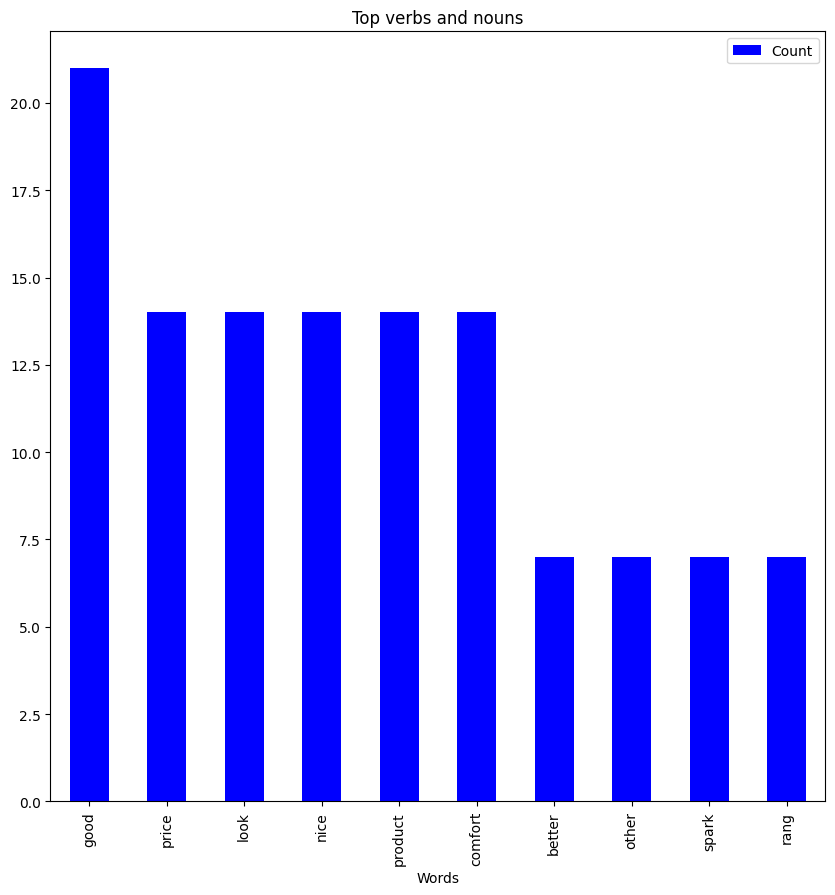

In [ ]:
DF[0:10].plot.bar(x='Words', figsize=(10,10), title='Top verbs and nouns',color='blue')

In [ ]:
rating_counts = Data["rating"].value_counts()

In [ ]:
rating_counts

3.0    35
4.0    28
5.0     7
Name: rating, dtype: int64

In [ ]:
Data['rating']

0     4.0
1     3.0
2     3.0
3     4.0
4     4.0
     ... 
65    3.0
66    3.0
67    5.0
68    4.0
69    3.0
Name: rating, Length: 70, dtype: float64

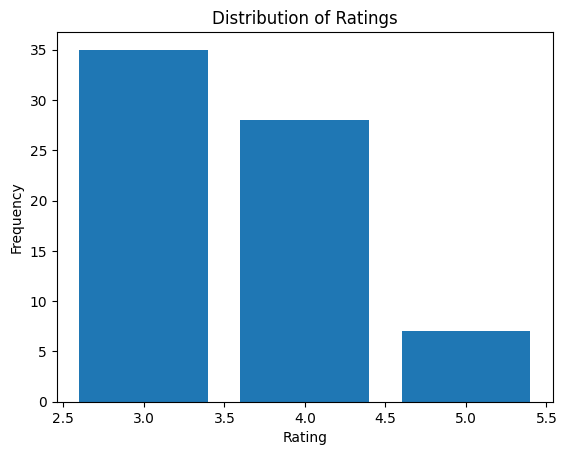

In [ ]:
# Plot a bar chart
plt.bar(x=rating_counts.index, height=rating_counts.values)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Ratings")
plt.show()

In [ ]:
cv.get_feature_names_out()

array(['better', 'comfort', 'fine', 'foot', 'good', 'longer', 'look',
       'low', 'mark', 'nice', 'noth', 'offici', 'other', 'price',
       'product', 'qualiti', 'rang', 'reach', 'size', 'sleeper',
       'smaller', 'spark', 'strap', 'take', 'use', 'wise'], dtype=object)

In [ ]:
cv.analyzer

'word'

In [ ]:
CountVector=pd.DataFrame(a,columns=cv.get_feature_names_out())

In [ ]:
CountVector

,better,comfort,fine,foot,good,longer,look,low,mark,nice,...,rang,reach,size,sleeper,smaller,spark,strap,take,use,wise
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
66,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
67,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF

In [ ]:
b=np.array(Data["body_en"])

In [ ]:
tv=TfidfVectorizer()
b=tv.fit_transform(b).toarray()
tv.vocabulary_

{'better': 0,
 'other': 12,
 'spark': 21,
 'rang': 16,
 'price': 13,
 'look': 6,
 'wise': 25,
 'good': 4,
 'qualiti': 15,
 'low': 7,
 'use': 24,
 'longer': 5,
 'reach': 17,
 'mark': 8,
 'nice': 9,
 'product': 14,
 'take': 23,
 'size': 18,
 'fine': 2,
 'strap': 22,
 'smaller': 20,
 'foot': 3,
 'comfort': 1,
 'sleeper': 19,
 'offici': 11,
 'noth': 10}

In [ ]:
TFIDF=pd.DataFrame(b,columns=tv.get_feature_names_out())
TFIDF

,better,comfort,fine,foot,good,longer,look,low,mark,nice,...,rang,reach,size,sleeper,smaller,spark,strap,take,use,wise
0,0.464036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.464036,0.000000,0.000000,0.000000,0.000000,0.464036,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.276005,0.404575,0.324681,0.404575,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.404575,0.404575
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,...,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.469713,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.688517,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.000000,0.000000,0.447214,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.447214,0.000000,0.447214,0.000000,0.447214,0.000000,0.000000,0.000000
66,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
67,0.000000,0.442575,0.000000,0.000000,0.000000,0.000000,0.442575,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.551478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
68,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
TFIDF.head(5)

,better,comfort,fine,foot,good,longer,look,low,mark,nice,...,rang,reach,size,sleeper,smaller,spark,strap,take,use,wise
0,0.464036,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.464036,0.000000,0.0,0.0,0.0,0.464036,0.0,0.000000,0.000000,0.000000
1,0.000000,0.0,0.0,0.0,0.276005,0.404575,0.324681,0.404575,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.404575,0.404575
2,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,...,0.000000,0.707107,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,0.000000,0.0,0.0,0.0,0.469713,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.688517,0.000000,0.000000


## Sentimental Analysis

In [ ]:
affin=Data["body_en"]

In [ ]:
affin

0             better other spark rang price
1     look wise good qualiti low use longer
2                                reach mark
3                              nice product
4                           good take price
                      ...                  
65             size fine strap smaller foot
66                             nice product
67              comfort sleeper offici look
68                                     noth
69                             good comfort
Name: body_en, Length: 70, dtype: object

### Vader Lexicon

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
def get_vader_sentiment(letter):

  sia=SentimentIntensityAnalyzer()
  # create text blob object of passed tweet text
  analysis=sia.polarity_scores(letter)
  # set sentiment
  if analysis["compound"]>0:
    return "Satisfied"
  elif analysis["compound"]<0:
    return "Not satisfied"
  else:
    return "neutral"

In [ ]:
Emotion=pd.DataFrame()

In [ ]:
Emotion["sentiment"]=Data["body_en"].apply(get_vader_sentiment)

In [ ]:
Data["Sentiment"] = Data["body_en"].apply(get_vader_sentiment)

In [ ]:
sia=SentimentIntensityAnalyzer()

In [ ]:
Data['scores']=Data['body_en'].apply(lambda letter: sia.polarity_scores(letter))

In [ ]:
Data['compound']=Data['scores'].apply(lambda scores: scores['compound'])

In [ ]:
Data['comp_score'] = Data['compound'].apply(lambda comp: 'Satisfied' if comp > 0 else ('Not satisfied' if comp < 0 else 'neutral'))

In [ ]:
Data['scores']

0     {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...
1     {'neg': 0.174, 'neu': 0.331, 'pos': 0.496, 'co...
2     {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...
3     {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...
4     {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...
                            ...                        
65    {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...
66    {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...
67    {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp...
68    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
69    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
Name: scores, Length: 70, dtype: object

In [ ]:
Data['compound']

0     0.5859
1     0.5994
2     0.0258
3     0.4215
4     0.4404
       ...  
65    0.2023
66    0.4215
67    0.3612
68    0.0000
69    0.6597
Name: compound, Length: 70, dtype: float64

In [ ]:
Data.index

RangeIndex(start=0, stop=70, step=1)

Text(0.5, 1.0, 'Emotion plot for each Customer')

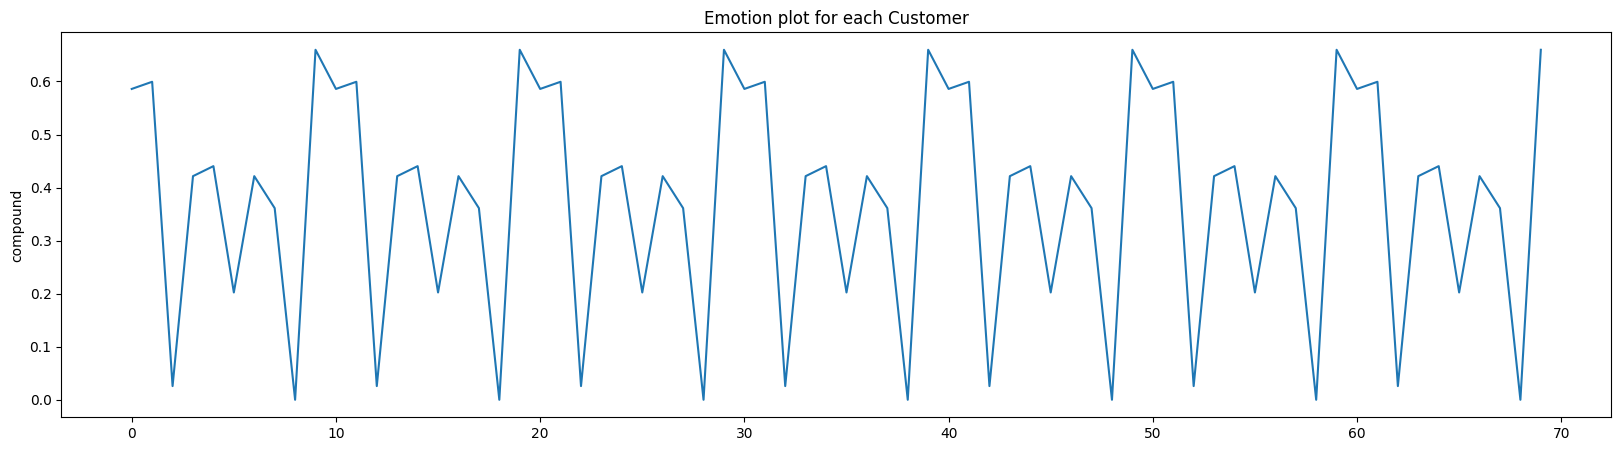

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(y='compound',x=Data.index,data=Data)
plt.title("Emotion plot for each Customer")

In [ ]:
Data.head(14)

,title,rating,body_en,Sentiment,scores,compound,comp_score
0,Good not the best,4.0,better other spark rang price,Satisfied,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...",0.5859,Satisfied
1,Lookwise good but very soft not use longer,3.0,look wise good qualiti low use longer,Satisfied,"{'neg': 0.174, 'neu': 0.331, 'pos': 0.496, 'co...",0.5994,Satisfied
2,Not good,3.0,reach mark,Satisfied,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.0258,Satisfied
3,It's very smooth sleeper,4.0,nice product,Satisfied,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,Satisfied
4,फिट फाट,4.0,good take price,Satisfied,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404,Satisfied
5,Size 6 per foot but small straps for size 5,3.0,size fine strap smaller foot,Satisfied,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",0.2023,Satisfied
6,Useful,3.0,nice product,Satisfied,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,Satisfied
7,This is a best Sparx sleper,5.0,comfort sleeper offici look,Satisfied,"{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp...",0.3612,Satisfied
8,Good as aspected,4.0,noth,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
9,Slippers,3.0,good comfort,Satisfied,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6597,Satisfied


In [ ]:
Emotion.head(10)

,sentiment
0,Satisfied
1,Satisfied
2,Satisfied
3,Satisfied
4,Satisfied
5,Satisfied
6,Satisfied
7,Satisfied
8,neutral
9,Satisfied


In [ ]:
sentiment_data

sentiment
Satisfied    63
neutral       7
dtype: int64

In [ ]:
sentiment_data=Emotion['sentiment']

In [ ]:
sentiment_counts = pd.Series(sentiment_data).value_counts()

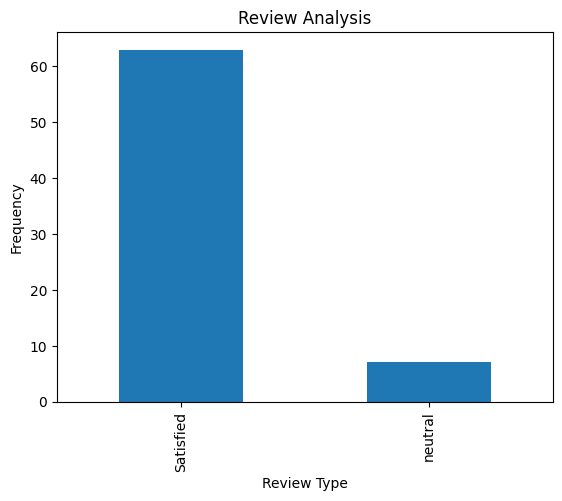

In [ ]:
ax = sentiment_counts.plot.bar()
ax.set_xlabel('Review Type')
ax.set_ylabel('Frequency')
ax.set_title('Review Analysis')
plt.show()

In [ ]:
print(accuracy_score(Data["Sentiment"],Data['comp_score']))

1.0


## Word Cloud

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

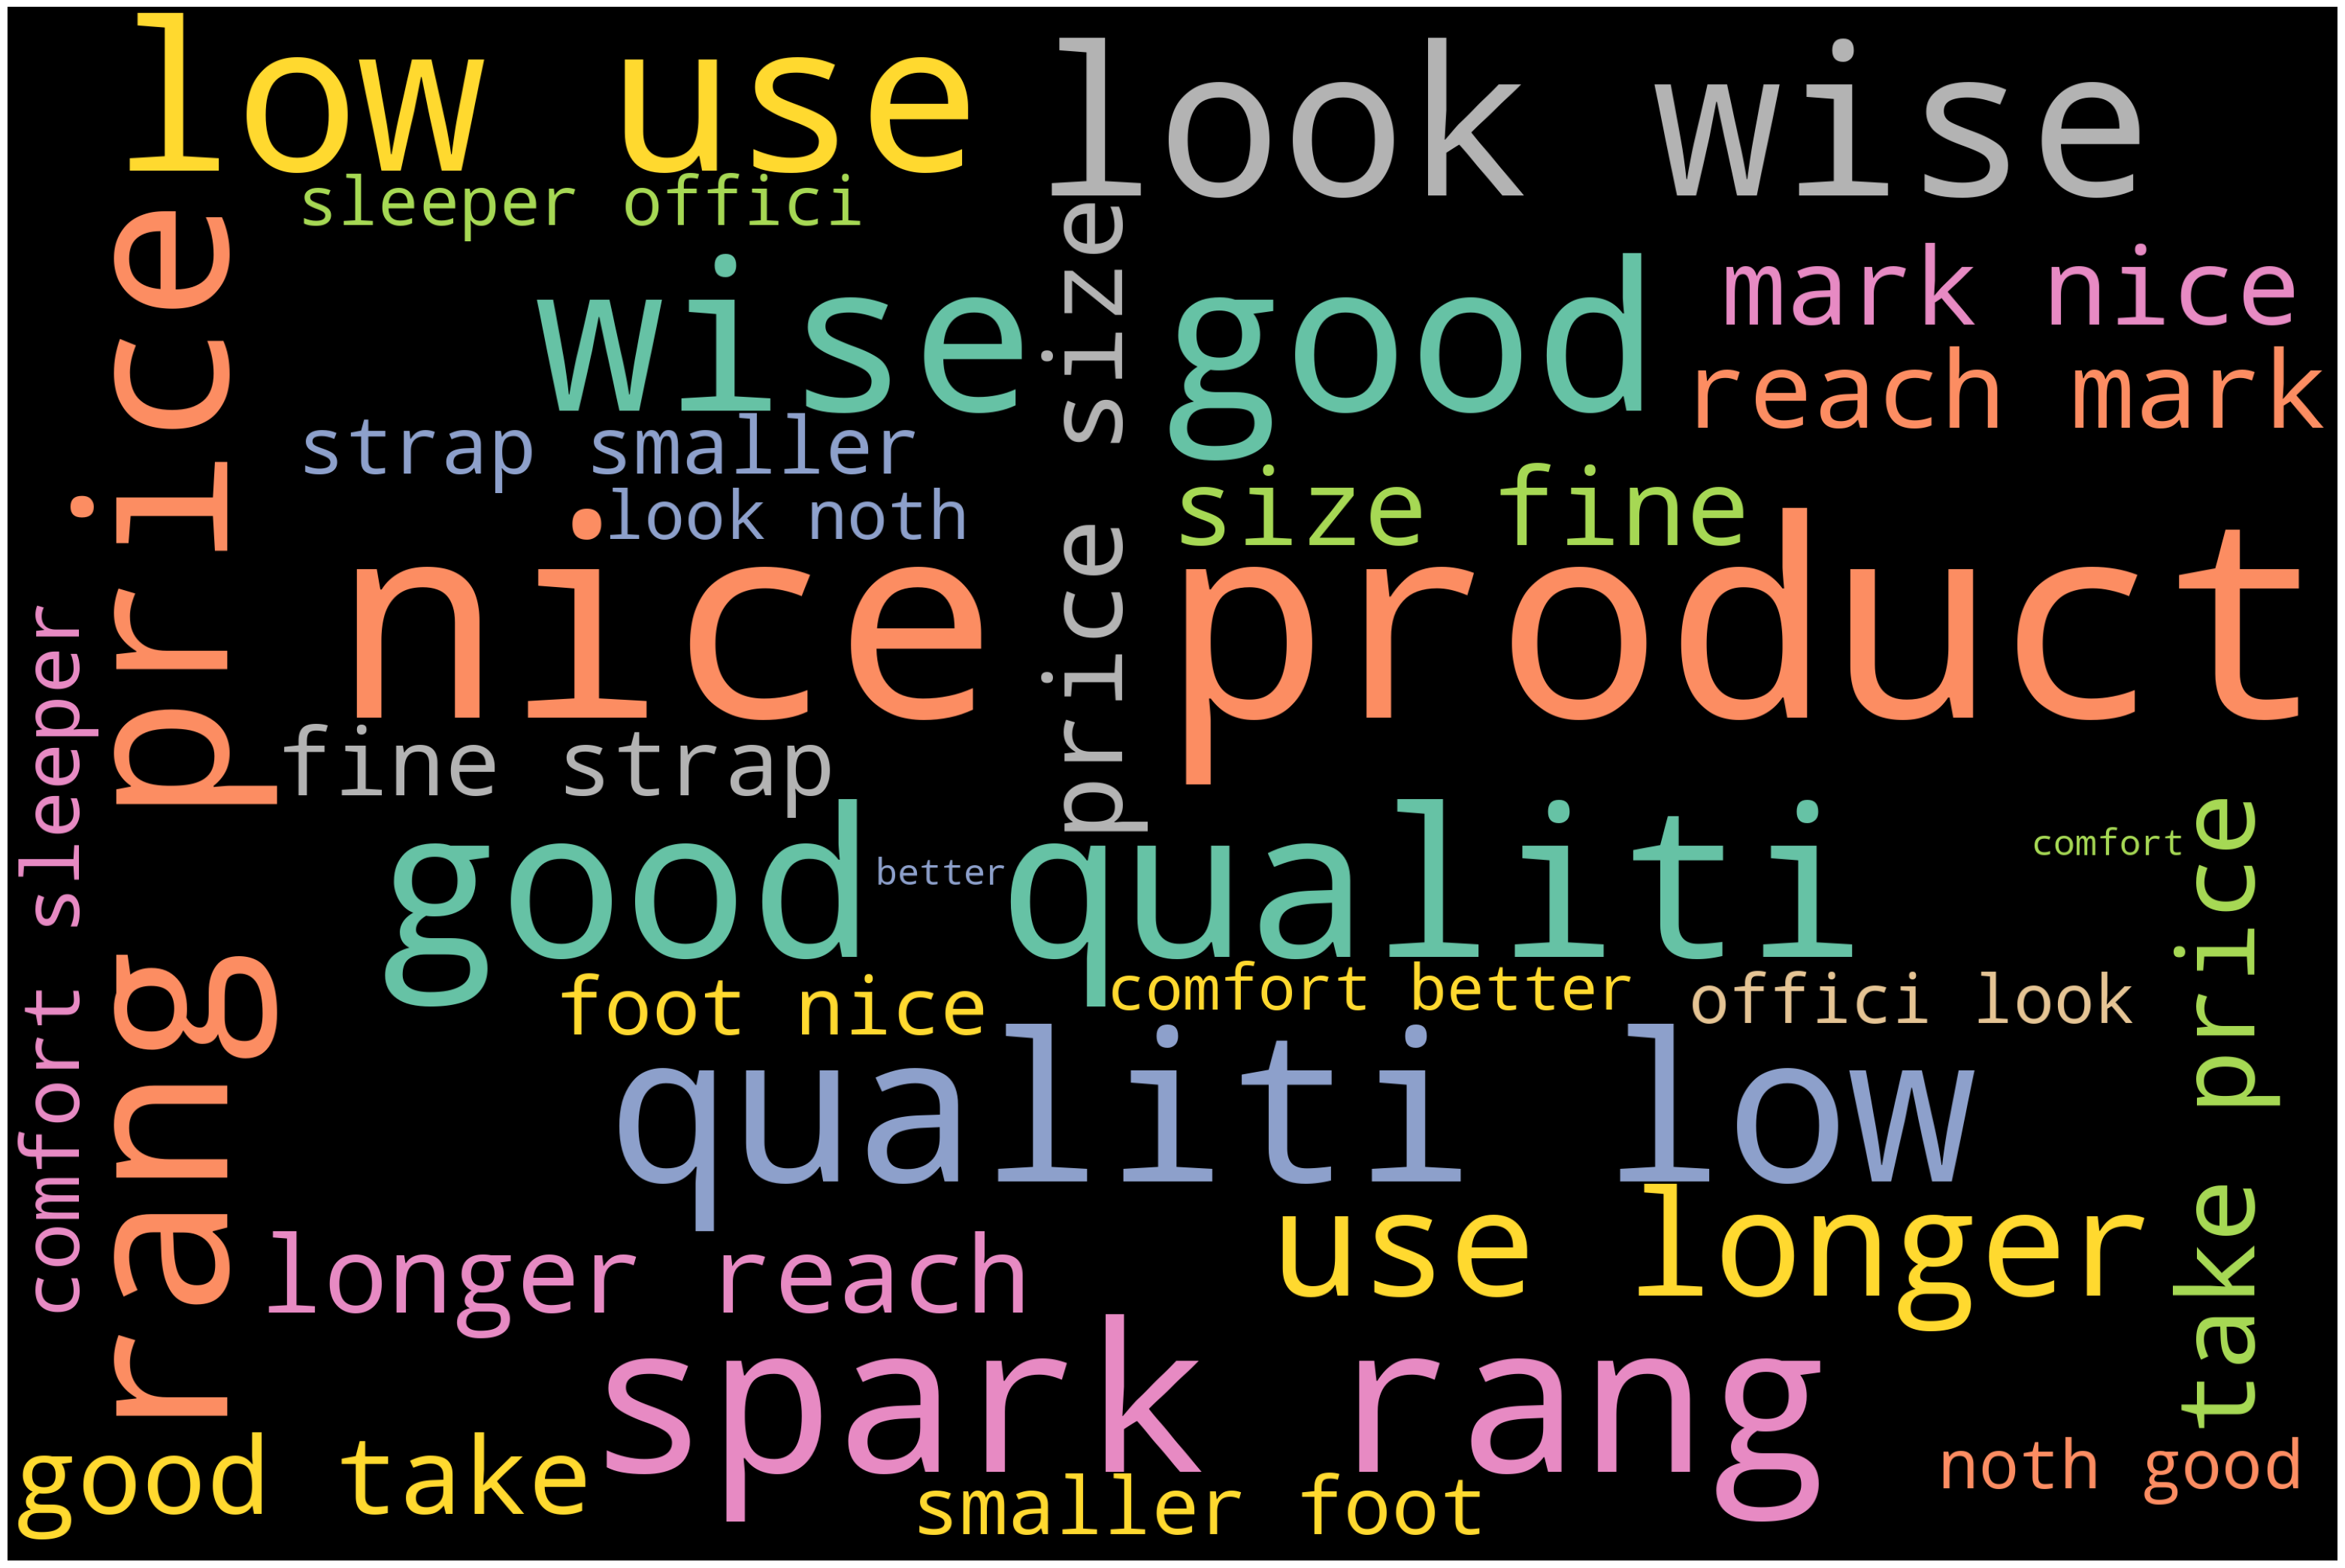

In [ ]:
word = np.array(Data["body_en"])
word = word.astype(str)  # convert to string type
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(' '.join(word))
plot_cloud(wordcloud)

#### Most of the customers given good review

## MODEL BUILDING

#### Importing Libraries

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import statsmodels.api as sm

In [ ]:
label=LabelEncoder()
score=label.fit_transform(Data["comp_score"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(b ,score, test_size = 0.3) 

In [ ]:
X_train

,better,comfort,fine,foot,good,longer,look,low,mark,nice,...,rang,reach,size,sleeper,smaller,spark,strap,take,use,wise
44,0.000000,0.000000,0.000000,0.000000,0.469713,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.688517,0.000000,0.000000
14,0.000000,0.000000,0.000000,0.000000,0.469713,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.688517,0.000000,0.000000
38,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
55,0.000000,0.000000,0.447214,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.447214,0.000000,0.447214,0.000000,0.447214,0.000000,0.000000,0.000000
63,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.469713,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.688517,0.000000,0.000000
17,0.000000,0.442575,0.000000,0.000000,0.000000,0.000000,0.442575,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.551478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
61,0.000000,0.000000,0.000000,0.000000,0.276005,0.404575,0.324681,0.404575,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.404575,0.404575
31,0.000000,0.000000,0.000000,0.000000,0.276005,0.404575,0.324681,0.404575,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.404575,0.404575
25,0.000000,0.000000,0.447214,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.447214,0.000000,0.447214,0.000000,0.447214,0.000000,0.000000,0.000000


In [ ]:
y_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
models=[DecisionTreeClassifier(random_state=10),LogisticRegression(),RandomForestClassifier(n_estimators=100)]
for model in models:
    model.fit(X_train,y_train)
    y_test_pred=model.predict(X_test)
    print(model,"accuracy ::",accuracy_score(y_test,y_test_pred))
    print(classification_report(y_test,y_test_pred))
    print(confusion_matrix(y_test,y_test_pred))
    print("=="*10)
    print()

DecisionTreeClassifier(random_state=10) accuracy :: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

[[19  0]
 [ 0  2]]

LogisticRegression() accuracy :: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

[[19  0]
 [ 0  2]]

RandomForestClassifier() accuracy :: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         2

    accu

#### All the models are performing very well